# Econet Customer Service Sentiment Analysis

The market share as reported in the Potraz sector report for the first quarter of 2018 states that Econet commands a market share of 65%, compared to Netone's 23% and Telecel's 12%. From those stats alone, one can deduce that Econet has a lion share in the mobile market. Because of this market dominance, and Econet's own innovativeness, Econet has been able to offer parallel services which are either influenced by the success of Econet as a brand or operate parallel to it (feeding off it). These services include, but are not limited to, EcoCash, Steward Bank, YoMix, etc. All these services are in addition to expected traditional services of a MNO such as voice calls, texts and data.

With all these services, it is expected that customer service issues may arise. Lately, subscribers of Econet's services multiple services have taken to social media (Twitter and Facebook) to criticise the MNO of poor delivery in that regard. The popular accusation seems to be that Econet has its hands in way too many baskets, which leads it to fail to perfect any particular service.

The goal of this project is to investigate the complaints levied against Econet and its umbrella of services.

The project will analyse data scraped from both twitter and facebook, the 2 platforms on which Zimbabweans interact with Econet Support the most.

Some important points to note before the analysis is the bias of the data. Since the analysis is to check the sentiment of the customers, one can argue that the only reason why a customer would interact with customer support to begin with would be to seek help with a grievance, hence, every tweet/post would contain negative sentiment to a degree. To counter this point, the project scope is going to be primarily on the behavior of negative/positive sentiment frequency over time. More variables will be considered, such as the change in market share overtime. One might argue that more customers will generally result in more complaints per customer. All this, and more, will be taken into account.

## Primary Objective:
 - A time series analysis of how the frequency of complaints on service has changed over the last 9 years.

## Other Objectives:
 - Which month does Econet experience the most complaints?
 - Which type of complaint is most prevalent? How do these complaint categories change over time?
 - How often do customers complain that their enquiries are being ignored?
 - Which Econet SBU experiences the most customer complaints?
 - Is there a certain cluster/segment of Econet's customers that experience poor service the most?
 - Has there been a change in the percentage of complaints that Econet gets as its market share has changed over the years?
 - How does Econet's customer service compare to it's competitors?

As stated before, the primary data will be scraped from twitter and facebook. Other supporting data will be sourced from different documents such as Potraz annual/quarterly reports, Econet annual reports, Competitor annual reports, etc.

## Tools to be used

The primary tool to be used is going to be the python programming language. Other tools such as sql (database storage) and tableau (visualisations) may also be used.

## Scraping the Data (Twitter)

In [32]:
!python scraper_2.py

Running the script above will scrap twitter for results that include the search terms "econet, netone, telecel or stewardbank", then order them in a table with the columns 'created_at', 'likes', 'replies', 'text', 'tweet_id', 'user_id', 'user_name' and 'user_screen_name'. The table is stored as a csv. For analysis, we read the csv and load it as a dataframe, as shown below.

In [451]:
data = pd.read_csv('/Users/mac/Desktop/Data Science/Projects/EconetSentimentAnalysis/data.csv', index_col=0)

## Exploratory Data Analysis

The data is now structured but we still need further insights of what it compromises of. This is also where we clean our data to make it ready for analysis.

Let's begin by taking a look at a snapshot of our data.

In [452]:
data.head()

,created_at,likes,replies,retweets,text,tweet_id,user_id,user_name,user_screen_name
0,1.553464e+12,2,3,0,Hello @econet_support my yo mix app is not ope...,1109936193834270721,3015154174,Osybel Simango,OsybelSimango
1,1.553559e+12,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,1110332540865441793,202805948,Tino,TinoNyandoro
2,1.553615e+12,0,1,0,@econet_support I sent you my query and no res...,1110567033366892545,1653228750,Moses Chibike,moses_chibike
3,1.553615e+12,0,2,1,@econet_support I did ecocash transaction from...,1110567533566980096,1110468887991197696,Pretty Mundawaro,MundawaroPretty
4,1.553607e+12,0,1,0,@econet_support hi guys i am trying to withdr...,1110535627811049472,797438395920175105,John Nyamutata,JohnNyamutata4


We can see that the columns we require are all there. However, the 'created_at' column, which can also be called the 'date_of_tweet' column, has the date in a format which isn't human readable. Let's change that.

In [453]:
from datetime import datetime


data['created_at'] = data['created_at'].apply(lambda x: datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))

In [454]:
data.head()

,created_at,likes,replies,retweets,text,tweet_id,user_id,user_name,user_screen_name
0,2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,1109936193834270721,3015154174,Osybel Simango,OsybelSimango
1,2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,1110332540865441793,202805948,Tino,TinoNyandoro
2,2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,1110567033366892545,1653228750,Moses Chibike,moses_chibike
3,2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,1110567533566980096,1110468887991197696,Pretty Mundawaro,MundawaroPretty
4,2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,1110535627811049472,797438395920175105,John Nyamutata,JohnNyamutata4


The date is now in a more readable format.

Next, let's explore the size and/or shape of our dataframe.

In [455]:
print('{} rows, {} columns'.format(data.shape[0], data.shape[1]))

4553 rows, 9 columns


In [456]:
data.dtypes

created_at          object
likes                int64
replies              int64
retweets             int64
text                object
tweet_id             int64
user_id              int64
user_name           object
user_screen_name    object
dtype: object

In [457]:
data.describe(include='all')

,created_at,likes,replies,retweets,text,tweet_id,user_id,user_name,user_screen_name
count,4553,4553.000000,4553.000000,4553.000000,4553,4.553000e+03,4.553000e+03,4553,4553
unique,4552,NaN,NaN,NaN,4543,NaN,NaN,1979,1983
top,2019-03-17 12:31:26,NaN,NaN,NaN,#FF *Hertha4ever* @Mowol @HerthaBerlinUK @zei...,NaN,NaN,Econet Wireless,econetzimbabwe
freq,2,NaN,NaN,NaN,4,NaN,NaN,177,177
mean,NaN,30.449813,4.298704,18.610147,NaN,8.044618e+17,1.438988e+17,NaN,NaN
std,NaN,110.338215,15.886818,201.262565,NaN,2.775495e+17,3.315195e+17,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,1.645406e+17,6.542030e+05,NaN,NaN
25%,NaN,2.000000,0.000000,2.000000,NaN,5.663900e+17,2.171913e+08,NaN,NaN
50%,NaN,7.000000,1.000000,4.000000,NaN,8.977475e+17,5.698809e+08,NaN,NaN
75%,NaN,25.000000,3.000000,11.000000,NaN,1.057531e+18,2.545300e+09,NaN,NaN


Our data set has 4,553 rows and 9 columns. After running some descriptive statistics on this data, we can see that no column contains null values as each column has a count of 4,553.

There are features on our data that aren't all that useful to our objective in this project, so it won't hurt to drop them. These are 'tweet_id', 'user_id' and 'user_screen_name'.

In [458]:
data.drop(columns=['tweet_id', 'user_id', 'user_name'], inplace=True)

In [459]:
data.head(3)

,created_at,likes,replies,retweets,text,user_screen_name
0,2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango
1,2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro
2,2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike


### Further Cleaning

The goal of our project is to come up with an aggregation of customer complaint count. Therefore, if our twitter search returned tweets by accounts belonging to Econet, NetOne, Telecel or StewardBank, we need to exclude them.

In [460]:
exclude_rows = data[(data['user_screen_name']=='econet_support') | (data['user_screen_name']=='econetzimbabwe') | (data['user_screen_name']=='EcoCashZW') | (data['user_screen_name']=='stewardbank') | (data['user_screen_name']=='NetOneCellular') | (data['user_screen_name']=='Netonesupport') | (data['user_screen_name']=='Telecel_Zim')]
print(exclude_rows.shape[0])
exclude_rows.head(3)

372


,created_at,likes,replies,retweets,text,user_screen_name
27,2019-03-26 17:06:09,0,0,0,Watch this space for more updates! ^WS,econet_support
35,2019-03-25 17:20:06,8,5,4,Enjoy affordable data rates that are valid for...,Telecel_Zim
37,2019-03-26 17:04:16,0,1,0,Resend via DM the details! ^WS,econet_support


The data shows that these results do exist and it has 372 rows. Upon scrutiny of the text column, we can see that it has nothing to do with enquiries which originated from a customer. Let's proceed to delete them.

In [461]:
exclude_list = list(exclude_rows.index.values)
data.drop(exclude_list, inplace=True)

In [462]:
data.shape[0]

4181

Our dataframe now has 4,181 rows remaining, down from the original 4553. Our 372 rows have now been dropped.

In Zimbabwe, Econet is a very big organization. As a result, it is often involved in philanthropy or disaster relief efforts. Examples are the recent 'Cyclone Idai' disaster. As a result, we should remove as many of these instances as we can.

Let's add a column which notes whether or not key words are found in a tweet.

In [463]:
import re

In [464]:
def find_key_words(x):
    r = re.compile(r'\bcyclone\b | \bebola\b | \bidai\b | \bdonate\b | \bdonation\b | \bnatural disaster\b | \bcorporate social responsibility\b | \bdonations\b  | \bphilanthropy\b| \bcholera\b | \bscholarship\b | \bscholarships\b', flags=re.I | re.X)
    if r.findall(x):
        return 1
    else:
        return 0

In [465]:
data['key_word_cleaner'] = data['text'].apply(find_key_words)

In [466]:
data.head()

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner
0,2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,0
1,2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,0
2,2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,0
3,2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,0
4,2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,0


In [467]:
data[data['key_word_cleaner']==1].shape[0]

83

We can see that there are 83 rows which contain key words, and their variants, for donate cyclone idai, scholarship, philanthropy, etc. Let's go ahead and drop them.

In [468]:
data = data[data['key_word_cleaner']==0]

In [469]:
data.shape[0]

4098

Our number of rows has dropped from 4,181 to 4,098. Therefore, the rows we do not want have been dropped.

To keep up with our data cleaning, so far we have removed:
 - tweets that were tweeted by accounts belonging to the company(s) we are investigating,
 - removed tweets which involve Econet, Telecel and Netone performing philanthropic acts.

The second point could've been achieved later on when we remove tweets which have a positive sentiment (after running an algorithm). However, after going thorugh some tweets, there are some philanthropic tweets which contain negative terms like 'sad' and 'bad' (describing cyclone idai, for example). These would've confused the sentiment analysis algorithm and possibly produced a false negative. The above method just adds to our thoroughness.

Let's perform our descriptive stats again and see if we can find any red flags.

In [470]:
data.describe(include='all')

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner
count,4098,4098.000000,4098.000000,4098.000000,4098,4098,4098.0
unique,4097,NaN,NaN,NaN,4088,1950,NaN
top,2019-03-17 12:31:26,NaN,NaN,NaN,#FF *Hertha4ever* @Mowol @HerthaBerlinUK @zei...,263Chat,NaN
freq,2,NaN,NaN,NaN,4,108,NaN
mean,NaN,28.861396,3.657882,17.683504,NaN,NaN,0.0
std,NaN,111.975126,11.956029,211.421366,NaN,NaN,0.0
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.0
25%,NaN,2.000000,0.000000,2.000000,NaN,NaN,0.0
50%,NaN,7.000000,1.000000,4.000000,NaN,NaN,0.0
75%,NaN,24.000000,2.000000,11.000000,NaN,NaN,0.0


Taking a look at the distribution of our tweets, we can see that the minimum number of likes and retweets is both 0. That's understandable and expected. However, the maximum numbers of likes and retweets are 5444 and 9619, respectively. It's very unlikely that a tweet regarding enquiry of service would've such high numbers. It is then probably an outlier.

The IQR suggests that most of our tweets have likes ranging between 2 & 24 and retweets ranging between 2 & 11. This is much more believable. Let's investigate further, visually.

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

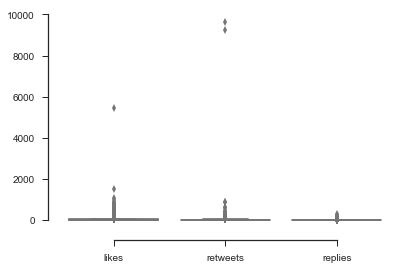

In [472]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=data[['likes', 'retweets', 'replies']])

sns.despine(offset=10, trim=True)

The outliers are so large that the scale of our boxplots is compromised.

Let's take a look at the data associated with these outliers. From the graph above, we can see that the begin at over 500 replies (safe bet that these tweets are also the ones with the large retweets).

In [473]:
data[data['likes']>5000]

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner
867,2018-12-22 18:55:23,5444,13,9619,Being cheated silentlyhttps://twitter.com/abby...,missfatimasha_,0


Only one row is returned. Let us investigate the text and see what it contains. (Note that this is also the tweet responsoble for the retweets outlier)

In [474]:
data[data['likes']>5000]['text']

867    Being cheated silentlyhttps://twitter.com/abby...
Name: text, dtype: object

The tweet seems to contain a retweet which was not loaded fully. Let's delete it all the same as it does not provide any useful information for us.

In [475]:
data = data[data['likes']<5000]

In [476]:
data[data['likes']>5000]

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner


The tweet no longer exists in our dataframe. Let's plot our box plot again.

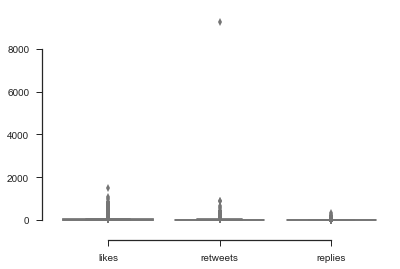

In [477]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=data[['likes', 'retweets', 'replies']])

sns.despine(offset=10, trim=True)

One tweet with over 8000 retweets still exists. Let's also take a look at it.

In [478]:
data[data['retweets']>8000]

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner
730,2019-01-18 15:25:42,539,2,9250,ไม่เคยมองว่าซากุระหน้าเหมือนชานยอล จนวันนี้จัด...,KpopSalub,0


The tweet is in a language which isn't spoken in Zimbabwe. It's also safe to drop it.

In [479]:
data = data[data['retweets']<8000]

In [480]:
data[data['retweets']>8000]

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner


The tweet has been deleted.

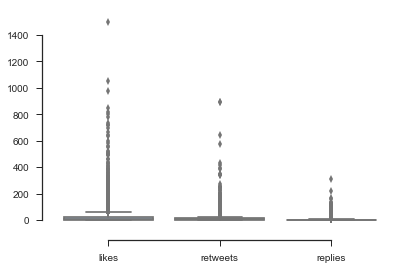

In [481]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=data[['likes', 'retweets', 'replies']])

sns.despine(offset=10, trim=True)

As seen in the box plots above, our data still contains a lot of outliers. Let's investigate all tweets with likes over 200, to begin with.

In [482]:
data[data['likes']>200]

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner
5,2019-03-25 12:49:05,292,105,22,hie @EcoCashZW @econet_support l bought $1 dai...,FaffieManhuhwa,0
63,2019-03-26 05:52:25,221,57,41,Ndambouyawo kuTelecel for the meantime... ndic...,TatsNewton,0
77,2019-03-23 20:55:34,301,84,36,I'm 21 yrs old. I own 3 major platinum mines (...,joannahself,0
78,2019-03-22 21:24:01,1055,86,260,The search and rescue operations by the Econet...,TapiwaMunjoma,0
84,2019-03-22 17:26:36,292,311,33,Leave a message for Econet using lyrics from a...,FaffieManhuhwa,0
86,2019-03-22 07:15:58,234,30,61,"My relationship with Econet, ndakagarira line ...",4our_Zw,0
153,2019-03-19 13:05:15,252,9,51,#IfIMeet Strive Masiyiwa i would tell him the...,NyoniTinotenda,0
194,2019-03-17 15:50:09,223,24,27,Econet is now just giving shitty service just ...,tapiwaDEMO,0
246,2019-03-18 19:06:08,236,27,26,getting through to Econet Customer Service is ...,FaffieManhuhwa,0
337,2019-03-14 11:46:40,341,14,87,Even if you can put your phone on flight mode ...,Kuks_dj,0


A quick scroll through the tweets shows that most of them are very legitimate.

In [484]:
data[data['likes']>200].loc[[713, 746, 754, 756]]['text']

713    #WhileTheInternetWasOff  l discovered kuti Var...
746    Around midnight , #Zimbabwe plunged back into ...
754    Seeing as econet was so ready to comply with t...
756    On ZBC yesterday, the Ministry of Information ...
Name: text, dtype: object

However, I noticed that a few of these tweets are about January 2019's internet shutdown. It'd be very biased to include this data in the sentiment analysis as it is something Econet had no control over. So let's remove all rows that contain the phrases 'internet shutdown', 'shutdownzimbabwe', 'whiletheinternetwasoff', etc.

In [485]:
def find_key_words_2(x):
    r = re.compile(r'\#whiletheinternetwasoff | \#shutdownzimbabwe', flags=re.I | re.X)
    if r.findall(x):
        return 1
    else:
        return 0

In [486]:
data['key_word_cleaner_2'] = data['text'].apply(find_key_words_2)

In [487]:
data[data['key_word_cleaner_2']==1]

,created_at,likes,replies,retweets,text,user_screen_name,key_word_cleaner,key_word_cleaner_2
708,2019-01-23 03:37:52,6,1,0,#WhileTheInternetWasOff i realised that econet...,Tadbean01,0,1
713,2019-01-22 13:13:50,202,18,22,#WhileTheInternetWasOff l discovered kuti Var...,WellenceMujuru,0,1
718,2019-01-22 04:18:09,10,1,2,#WhileTheInternetWasOff\n#econet please return...,geofreychipere,0,1
720,2019-01-21 20:15:27,37,0,6,#WhileTheInternetWasOff \n\nI learnt that econ...,TainyThatBrat,0,1
728,2019-01-20 19:25:13,32,1,47,Folks some of the victims of assault we are se...,Ndini_Rumbi,0,1
744,2019-01-18 04:33:06,18,5,575,Internet was restored in Zimbabwe with some re...,iafrikan,0,1
754,2019-01-16 17:20:08,423,40,180,Seeing as econet was so ready to comply with t...,Mamoxn,0,1
757,2019-01-16 15:24:46,23,3,28,It appears that some internet has been restore...,accessnow,0,1
761,2019-01-16 07:55:23,30,5,27,Econet opted to shut its telecommunications se...,iafrikan,0,1
764,2019-01-15 22:03:09,17,19,17,The only other option was imprisonment: Strive...,zimlive,0,1


In [488]:
data[data['key_word_cleaner_2']==1].shape[0]

14

The data returned above is that with the hashtags #shutdownzimbabwe and #WhileTheInternetWasOff. There are only 14 rows. However, I believe there are more tweets about the shutdown in the dataframe. Let's subset all tweets that exist in Jan, 2019.

Let's make the 'created_at' column our index to make subsetting easier.

In [489]:
data.set_index('created_at', inplace=True)

In [490]:
data.index = pd.to_datetime(data.index)

In [491]:
data.head()

,likes,replies,retweets,text,user_screen_name,key_word_cleaner,key_word_cleaner_2
created_at,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,0,0
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,0,0
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,0,0
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,0,0
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,0,0


In [492]:
data.loc['2019-01'].sort_index().head()

,likes,replies,retweets,text,user_screen_name,key_word_cleaner,key_word_cleaner_2
created_at,,,,,,,
2019-01-01 14:43:09,28,6,16,1. The Strive/Econet/Daniel Shumba story hoggi...,GomoDubi,0,0
2019-01-02 09:02:32,8,2,1,1.Make undeniably great music\n2.Branding that...,Planet_Dodger,0,0
2019-01-02 09:43:33,102,34,25,Life is so good on these streets without the b...,TalithaGudo,0,0
2019-01-02 09:48:42,14,0,2,It's better to use NetOne knowing you are cont...,Chinamhata_PA,0,0
2019-01-02 12:03:00,45,9,3,Econet ndomatsotsi ekupedzisira ummm.Hanzi u c...,NatalieMakwetse,0,0


In [493]:
def find_key_words_3(x):
    r = re.compile(r'\bblocking\b | \bblocked\b | \bblock\b | \bshutdown\b | \bshut\b | \bdown\b', flags=re.I | re.X)
    if r.findall(x):
        return 1
    else:
        return 0

In [494]:
data['key_word_cleaner_3'] = data['text'].apply(find_key_words_3)

In [495]:
data.loc['2019-01'][data.loc['2019-01']['key_word_cleaner_3']==1].shape

(31, 8)

We have found another 31 rows of data to remove.

In [496]:
data = data[data['key_word_cleaner_2']==0]

In [497]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [498]:
exclude_list_2 = list(data.loc['2019-01'][data.loc['2019-01']['key_word_cleaner_3']==1].index.values)
data.drop(exclude_list_2, inplace=True)

In [499]:
data.shape[0]

4055

Now back to our box plots.

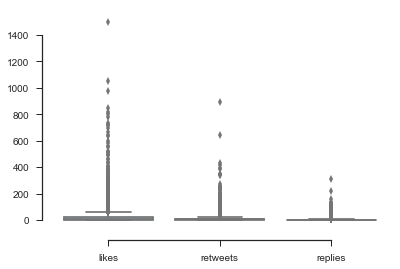

In [500]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=data[['likes', 'retweets', 'replies']])

sns.despine(offset=10, trim=True)

In [501]:
data[data['likes']>500]

,likes,replies,retweets,text,user_screen_name,key_word_cleaner,key_word_cleaner_2,key_word_cleaner_3
created_at,,,,,,,,
2019-03-22 21:24:01,1055,86,260,The search and rescue operations by the Econet...,TapiwaMunjoma,0,0,0
2019-02-28 15:49:19,819,45,140,The smell of onion on your hands actually last...,FaffieManhuhwa,0,0,0
2019-02-26 17:11:10,637,44,131,They know your girlfriend is texting 8 other g...,4our_Zw,0,0,0
2019-02-21 08:15:44,698,64,394,Nitel was thrown out of business by competitio...,HAHayatu,0,0,0
2019-01-04 14:07:45,801,157,154,Econet data is like \n$1 Daily 250mb\n$1 weekl...,GuzhaJoyce,0,0,0
2018-12-30 19:38:21,507,100,60,"I have this ex anoshanda ku Econet , everytime...",tarylucy,0,0,1
2018-12-22 08:08:12,717,115,162,Zimbabwean 1GB on Econet not the same as 1GB o...,Mathuthu,0,0,0
2018-11-28 06:58:42,555,53,99,Econet is my service provider.His call was nev...,nelsonchamisa,0,0,0
2018-11-12 16:45:25,642,72,149,Dear @econet_support I have Just received an s...,Native_Simba,0,0,0


Again, although the large number of likes and/or retweets signals a flag differentiating these tweets from the majority, the content says otherwise. What we can simply deduce from this is that these tweets contain content that resonated with more people than the ones found in our IQR.

For curiosity's sake, let's transform our likes, retweets and replies columns to a more shorter scale so that we can investigate the shape of the spread of our data.

In [502]:
import numpy as np

data["log(likes)"] = data["likes"] + 7
data["log(likes)"] = data["log(likes)"].apply(np.log)

data["log(retweets)"] = data["retweets"] + 7
data["log(retweets)"] = data["log(retweets)"].apply(np.log)

data["log(replies)"] = data["replies"] + 7
data["log(replies)"] = data["log(replies)"].apply(np.log)

In [503]:
data.head()

,likes,replies,retweets,text,user_screen_name,key_word_cleaner,key_word_cleaner_2,key_word_cleaner_3,log(likes),log(retweets),log(replies)
created_at,,,,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,0,0,0,2.197225,1.945910,2.302585
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,0,0,0,4.127134,2.397895,2.079442
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,0,0,0,1.945910,1.945910,2.079442
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,0,0,0,1.945910,2.079442,2.197225
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,0,0,0,1.945910,1.945910,2.079442


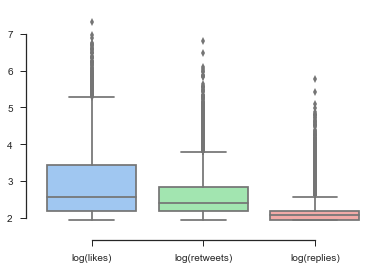

In [504]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=data[['log(likes)', 'log(retweets)', 'log(replies)']])

sns.despine(offset=10, trim=True)

For both likes and retweets, the data in the upper quartile seems to be more spread than that in the bottom. The replies seem to be more evenly balanced around the median. Let's get a rough idea of the number of outliers we've compared to the rest of our data.

In [505]:
data.describe()

,likes,replies,retweets,key_word_cleaner,key_word_cleaner_2,key_word_cleaner_3,log(likes),log(retweets),log(replies)
count,4055.000000,4055.000000,4055.000000,4055.0,4055.0,4055.000000,4055.000000,4055.000000,4055.000000
mean,26.859926,3.513687,12.439704,0.0,0.0,0.017756,2.895478,2.627719,2.200869
std,72.238625,11.476182,32.973697,0.0,0.0,0.132079,0.925078,0.653201,0.427623
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.945910,1.945910,1.945910
25%,2.000000,0.000000,2.000000,0.0,0.0,0.000000,2.197225,2.197225,1.945910
50%,6.000000,1.000000,4.000000,0.0,0.0,0.000000,2.564949,2.397895,2.079442
75%,24.000000,2.000000,10.000000,0.0,0.0,0.000000,3.433987,2.833213,2.197225
max,1497.000000,311.000000,892.000000,0.0,0.0,1.000000,7.315884,6.801283,5.762051


In [267]:
print('Outliers: {}'.format(data[data['log(likes)']>5.2].shape[0]))
print('Rest of data {}'.format(data.shape[0]-data[data['log(likes)']>5.2].shape[0]))

Outliers: 115
Rest of data 3940


Our descriptive stats show that 'key_word_cleaner_3' has a ma value of 1. This is a red flag as we should've dropped all rows with a value of 1 in that column. Let's investigate.

In [270]:
data[data['key_word_cleaner_3']==1].shape[0]

72

There are 72 rows which we forgot to drop. Let's fix that error.

In [271]:
data = data[data['key_word_cleaner_3']==0]

In [272]:
data.shape[0]

3983

I just remembered that there is an ecosure account on twitter, as well as for elevateyouth onemoney and telecash. Let's see if there are any tweets associated with them.

In [278]:
data[(data['user_screen_name']=='EcoSureZW') | (data['user_screen_name']=='OneMoneyZw') | (data['user_screen_name']=='TelecashZim') | (data['user_screen_name']=='elevateyouthzw')]

,likes,replies,retweets,text,user_screen_name,key_word_cleaner,key_word_cleaner_2,key_word_cleaner_3,log(likes),log(retweets),log(replies)
created_at,,,,,,,,,,,
2019-02-22 13:44:15,73,12,71,Lets Do This.. #WeekendVibes with @DjClive Liv...,elevateyouthzw,0,0,0,4.382027,4.356709,2.944439
2019-01-03 10:38:58,26,18,24,"How about a bundle Created By You, 4 You?\n\nY...",elevateyouthzw,0,0,0,3.496508,3.433987,3.218876
2018-12-18 07:07:46,31,13,25,Real talk Econet #YoMix has changed the game! ...,elevateyouthzw,0,0,0,3.637586,3.465736,2.995732
2018-10-30 15:14:16,83,0,75,The key elements for businesses to survival in...,elevateyouthzw,0,0,0,4.499810,4.406719,1.945910
2018-10-23 07:45:42,117,4,122,Want to be your own BO$$ earning $600/month? N...,elevateyouthzw,0,0,0,4.820282,4.859812,2.397895
2018-09-14 08:09:32,112,0,102,"#2018NEF \nSecond speaker for the day, the HOS...",elevateyouthzw,0,0,0,4.779123,4.691348,1.945910
2018-09-14 07:40:16,125,1,115,"First speaker, Econet COO Mr @fayaz_king\nStew...",elevateyouthzw,0,0,0,4.882802,4.804021,2.079442
2018-09-13 13:16:50,109,1,99,#2018NEF \nDon't miss the 2018 National Entrep...,elevateyouthzw,0,0,0,4.753590,4.663439,2.079442
2018-07-06 12:26:23,73,1,67,It's happening #LetThemFestival 2018. Young Ar...,elevateyouthzw,0,0,0,4.382027,4.304065,2.079442


The tweets exist. Let's do away with them

In [280]:
ex = data[(data['user_screen_name']=='EcoSureZW') | (data['user_screen_name']=='OneMoneyZw') | (data['user_screen_name']=='TelecashZim') | (data['user_screen_name']=='elevateyouthzw')]
exclude_list_2 = list(ex.index.values)
data.drop(exclude_list_2, inplace=True)

In [281]:
data.shape[0]

3940

We have cleaned our data by removing irrelevant rows to our analysis as much as possible given the information that we know so far. Further rows can be deleted later when new insights appear. For now, this is the best we can do.

Let's drop the columns that we no longer need.

In [284]:
data.drop(columns=['key_word_cleaner', 'key_word_cleaner_2', 'key_word_cleaner_3',
       'log(likes)', 'log(retweets)', 'log(replies)'], inplace=True)

In [285]:
data.head(3)

,likes,replies,retweets,text,user_screen_name
created_at,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike


### Cleaning tweet content

The content in our tweets is the one we're going to apply sentiment analysis to. However, it is not clean to immediately do classification on. To get the best possible results, we need to transform it.

In [286]:
# import necessary packages

import string
import nltk
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

#### a) Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much with sentiment analysis. It is better to remove them from the text. Here we will replace everything except characters and hashtags with spaces.

In [423]:
data['tidy_tweet'] = data['text'].str.replace("[^a-zA-Z#]", " ")
data['tidy_tweet'] = data['tidy_tweet'].apply(str.lower)

In [424]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: re.sub(r'"?http+', '', x))

In [425]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: re.sub(r'\bco\b|\bzw\b|twitter', '', x))

In [361]:
data.head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,tidier_tweet,MNO_label
created_at,,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,Hello econet support my yo mix app is not ope...,"[hello, econet, support, yo, mix, open, whenev...",hello econet support yo mix open whenev open s...,e
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,Econet needs to stop sending me SEPARATE pro...,"[econet, need, stop, send, separ, promo, messa...",econet need stop send separ promo messag each ...,e
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,econet support I sent you my query and no res...,"[econet, support, sent, queri, respons]",econet support sent queri respons,e
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,econet support I did ecocash transaction from...,"[econet, support, ecocash, transact, from, wal...",econet support ecocash transact from wallet ba...,e
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,econet support hi guys i am trying to withdr...,"[econet, support, guy, tri, withdraw, money, e...",econet support guy tri withdraw money ecocash ...,e


#### b) Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [364]:
data['tokenized_tweet'] = data['tidy_tweet'].apply(lambda x: x.split())
data.head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,tidier_tweet,MNO_label
created_at,,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,hello econet support my yo mix app is not ope...,"[hello, econet, support, my, yo, mix, app, is,...",hello econet support yo mix open whenev open s...,e
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,econet needs to stop sending me separate pro...,"[econet, needs, to, stop, sending, me, separat...",econet need stop send separ promo messag each ...,e
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,econet support i sent you my query and no res...,"[econet, support, i, sent, you, my, query, and...",econet support sent queri respons,e
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,econet support i did ecocash transaction from...,"[econet, support, i, did, ecocash, transaction...",econet support ecocash transact from wallet ba...,e
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,econet support hi guys i am trying to withdr...,"[econet, support, hi, guys, i, am, trying, to,...",econet support guy tri withdraw money ecocash ...,e


In [365]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label
created_at,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,hello econet support my yo mix app is not ope...,"[hello, econet, support, my, yo, mix, app, is,...",e
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,econet needs to stop sending me separate pro...,"[econet, needs, to, stop, sending, me, separat...",e
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,econet support i sent you my query and no res...,"[econet, support, i, sent, you, my, query, and...",e
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,econet support i did ecocash transaction from...,"[econet, support, i, did, ecocash, transaction...",e
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,econet support hi guys i am trying to withdr...,"[econet, support, hi, guys, i, am, trying, to,...",e


Our tweets are now much cleaner and better to apply a sentiment analysis algorithm on. However, we still don't know which tweets belong to which company. Let's find a way to label the tweets.

 - econet: 1
 - netone: 2
 - telecel 3
 
If a tweet contains 'econet', 'netone' and\or 'telecel' within it, we attribute the tweet as a complaint to econet and a threat to switch to another provider.

In [370]:
def labeller(x):
    if 'econet' or 'stewardbank' in x:
        return 'e'
    elif 'econet' and 'netone' in x:
        return 'es'
    elif 'econet' and 'telecel' in x:
        return 'es'
    elif 'netone' and not 'econet' in x:
        return 'n'
    elif 'telecel' and not 'econet' in x:
        return 't'
    else:
        return 0

In [371]:
data["MNO_label"] = data['tokenized_tweet'].apply(labeller)

In [372]:
data.head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label
created_at,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,hello econet support my yo mix app is not ope...,"[hello, econet, support, my, yo, mix, app, is,...",e
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,econet needs to stop sending me separate pro...,"[econet, needs, to, stop, sending, me, separat...",e
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,econet support i sent you my query and no res...,"[econet, support, i, sent, you, my, query, and...",e
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,econet support i did ecocash transaction from...,"[econet, support, i, did, ecocash, transaction...",e
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,econet support hi guys i am trying to withdr...,"[econet, support, hi, guys, i, am, trying, to,...",e


#### c) Language Checking

We;re almost done with cleaning our text. However, we are aware that our tweets contain english, shona and'or ndebele. Although, the sentiment analyzer we're going to use skips over non-english words and looks for sentiment in the available english ones, this might not be accurate enough. Since there are no translators good enough to convert shona\ndebele to english at the moment, we might need to drop the rows which have too much vernecular. Let's build a function that does this for us.

In [374]:
import enchant

In [375]:
def lang_checker(x):
    d = enchant.Dict("en_US")
    en_count=0
    sn_count=0
    for i in x:
        if d.check(i) is True:
            en_count+=1
        else:
            sn_count+=1
    if en_count>=sn_count:
        return True
    else:
        return False

In [376]:
data['lang'] = data['tokenized_tweet'].apply(lang_checker)

In [377]:
data.head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang
created_at,,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,hello econet support my yo mix app is not ope...,"[hello, econet, support, my, yo, mix, app, is,...",e,True
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,econet needs to stop sending me separate pro...,"[econet, needs, to, stop, sending, me, separat...",e,True
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,econet support i sent you my query and no res...,"[econet, support, i, sent, you, my, query, and...",e,True
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,econet support i did ecocash transaction from...,"[econet, support, i, did, ecocash, transaction...",e,True
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,econet support hi guys i am trying to withdr...,"[econet, support, hi, guys, i, am, trying, to,...",e,True


In [379]:
"There are {} majority english tweets and {} majority non-english tweets.".format(data[data['lang']==True].shape[0], data[data['lang']==False].shape[0])

'There are 3527 majority english tweets and 413 majority non-english tweets.'

We've got 413 non-english tweets in our data still. To avoid false positives when we carry out our sentiment analysis, let's drop them.

In [380]:
data = data[data['lang']==True]

In [381]:
data.shape[0]

3527

We can now say with some confidence our data has english tweets in it.

#### d) Understanding the common words used in the tweets: WordCloud

Let's visualize our most common words so that we can have an idea of which words occur the most in our tweets. We can proceed to clean out some of these words or even delete entire tweets we deem unnecessary to our analysis. One way to do this is to use a wordcloud.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

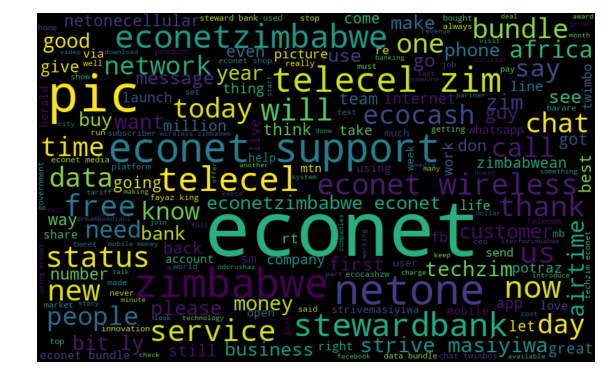

In [427]:
all_words = ' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see from our wordcloud that econet is overwhelmigly in the lead when it comes to word count. However, there are other variations of econet like 'econetzimbabwe' and 'econet support'. Let's delete their suffixes so that we remain with one instance of econet. We can also delete extensions to words like telecel, netone, etc.

In [430]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: re.sub(r'zimbabwe|\bsupport\b|\bwireless\b|\brt\b|\bmb\b|\bre\b|\bbank\b|\bzim\b|cellular|media|bundle|\bshop\b|\bgo\b', '', x))

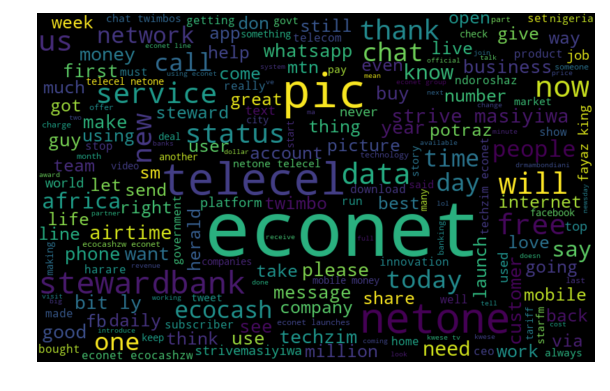

In [431]:
all_words = ' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Econet founder Strive Masiyiwa seems to have significant mentions in our dataset. Though it may happen that customers may direct their disgruntlement to a bussiness's owner, I doubt this is the case here. Let's investigate the tweets that do contain the pattern 'strive'.

In [442]:
print(data[data['tidy_tweet'].str.contains('strive', regex=True)].shape[0])
data[data['tidy_tweet'].str.contains('strive', regex=True)].head()

165


,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang
created_at,,,,,,,,,
2019-03-26 08:35:45,0,1,0,Strive Masiyiwa and Econet are now going to th...,Gambakwe,strive masiyiwa and econet are now going to th...,"[strive, masiyiwa, and, econet, are, now, goin...",e,True
2019-03-20 19:00:18,5,1,5,"The thing is, people are brands too!!!\nComing...",HoodNiggaz263,the thing is people are brands too coming ...,"[the, thing, is, people, are, brands, too, com...",e,True
2019-03-19 13:05:15,252,9,51,#IfIMeet Strive Masiyiwa i would tell him the...,NyoniTinotenda,#ifimeet strive masiyiwa i would tell him the...,"[#ifimeet, strive, masiyiwa, i, would, tell, h...",e,True
2019-03-19 15:50:05,13,2,2,Strive Masiyiwa: I almost bought Safaricom whe...,povozim,strive masiyiwa i almost bought safaricom whe...,"[strive, masiyiwa, i, almost, bought, safarico...",e,True
2019-03-14 08:11:51,61,1,24,"At the recently concluded #AfricaNow19 summit,...",spekeresort,at the recently concluded #africanow summit ...,"[at, the, recently, concluded, #africanow, sum...",e,True


There are 165 rows that mention the Econet founder. After going through them, it's clear that an overwhelming majority of them are mostly about his various business enterprises and philanthropy rather than customer engagement. With this knowledge, it's safe to remove these rows from the dataset.

In [450]:
data.shape

(165, 9)

N

We've cleaned our dataset for invalid rows and we've just finished cleaning up our text. We now need to identify which of our tweets have negative sentiments so that we can attribute them to a complaint or enquiry to the companies we've under investigation.

To classify our tweets, we're going to use the nltk classifier model from 'https://text-processing.com'. Our data has no labels, therefore, we cannot train it to predict sentiment values. *We could but it would require a lot more effort. There's an easier way.* We will use the API from the aforementioned site on our tweets. Having tested it, I am confident it wil produce good results.

In [383]:
import requests
import json

In [384]:
def sentiment_checker(x):
    data = 'text={}'.format(x)
    url = 'http://text-processing.com/api/sentiment/'
    r = requests.post(url, data=data)
    d = json.loads(r.text)
    return d['label']

In [392]:
#data['sentiment'] = data['tidy_tweet'].apply(sentiment_checker)
#sentiment_checker(data.iloc[0]['tidy_tweet'])

'neg'

In [393]:
tidy_tweet_list = list(data['tidy_tweet'])

In [400]:
import time
from textblob import TextBlob

In [402]:
sentiment = []
#for i in tidy_tweet_list:
#    time.sleep(2)
#    a = sentiment_checker(i)
#    sentiment.append(a)

for tweet in tidy_tweet_list:
    a = ''
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        a = 'pos'
    elif analysis.sentiment[0]<0:
        a = 'neg'
    else:
        a = 'neutral'
    sentiment.append(a)

In [403]:
sentiment[0:5]

['neutral', 'neutral', 'neutral', 'neutral', 'pos']

In [386]:
data.head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang
created_at,,,,,,,,,
2019-03-24 21:53:04,2,3,0,Hello @econet_support my yo mix app is not ope...,OsybelSimango,hello econet support my yo mix app is not ope...,"[hello, econet, support, my, yo, mix, app, is,...",e,True
2019-03-26 00:08:01,55,1,4,Econet needs to stop sending me 4 SEPARATE pro...,TinoNyandoro,econet needs to stop sending me separate pro...,"[econet, needs, to, stop, sending, me, separat...",e,True
2019-03-26 15:39:48,0,1,0,@econet_support I sent you my query and no res...,moses_chibike,econet support i sent you my query and no res...,"[econet, support, i, sent, you, my, query, and...",e,True
2019-03-26 15:41:48,0,2,1,@econet_support I did ecocash transaction from...,MundawaroPretty,econet support i did ecocash transaction from...,"[econet, support, i, did, ecocash, transaction...",e,True
2019-03-26 13:35:01,0,1,0,@econet_support hi guys i am trying to withdr...,JohnNyamutata4,econet support hi guys i am trying to withdr...,"[econet, support, hi, guys, i, am, trying, to,...",e,True
